Johannes Schade (5564109)

Yolanda Seifert (5477060)

David Bauer (5398867)


In this exercise, the task is to **train a regression model** to predict housing prices. To do this, you will use the *Boston Housing Dataset*, which contains data from the U.S. Census Service and contains data about housing in the area of Boston, Massachusetts. 

In [117]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers, Input, Model

**Load the dataset** either via [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-house-prices-dataset) or directly from its [original source](http://lib.stat.cmu.edu/datasets/boston)
into two *pandas* DataFrames X and Y (the features and target).

In [118]:
#names = {'0' : 'CRIM', '1' : 'ZN', '2' : 'INDUS', '3' : 'CHAS', '4' : 'NOX', '5' :}
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

x, y = datasets.load_boston(return_X_y=True)
data = pd.DataFrame(x, columns=names)
target = pd.DataFrame(y, columns=['MEDV'])

/home/david/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

Provide a **description** of the dataset in *pandas*. This will help you to get a first overview.

In [119]:
# 'describe()' the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [120]:
target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


**Clean up the data** by checking for missing values and removing them.

*Hint: DataFrames have a built-in method for doing that.*

In [121]:
# remove missing entries (if there are any)
for col in data.columns :
    print(data[col].isna().unique())

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


To better understand the dataset, **visualize** correlations between feature values and target values. This should highlight which features are most important for our models.

In [88]:
# create a scatter plot for each feature against the target variable


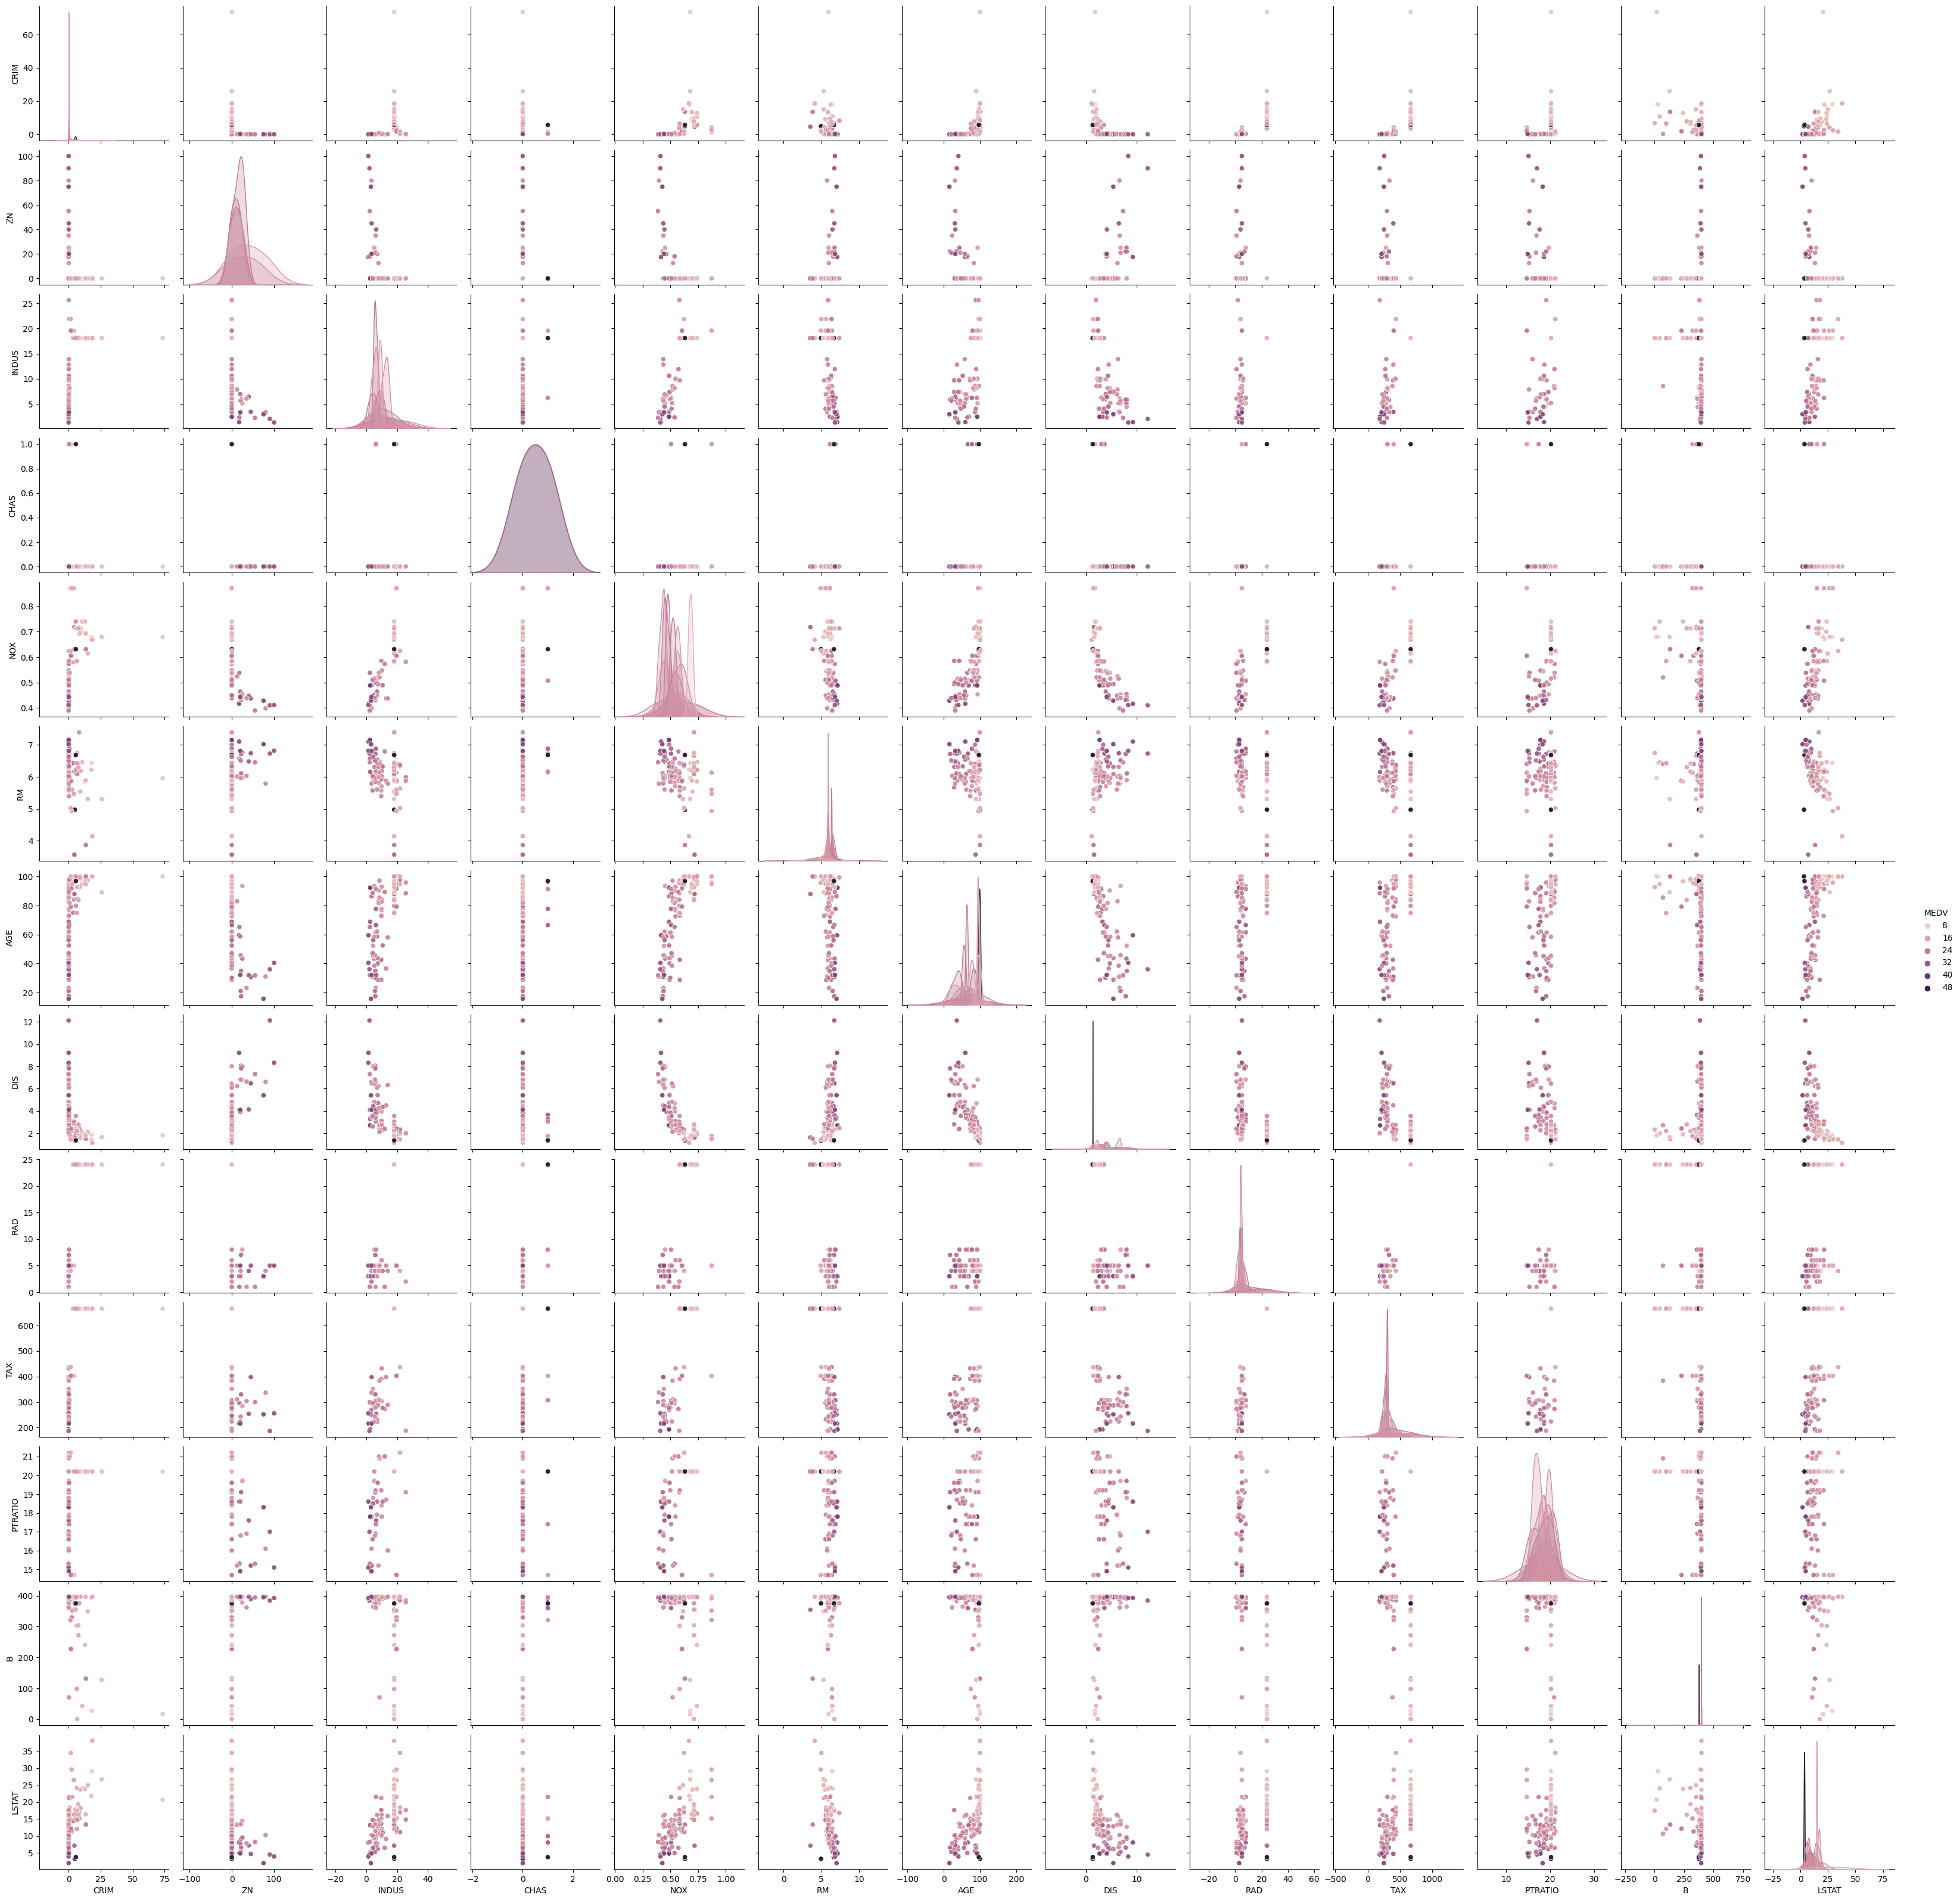

In [87]:
sns.pairplot(pd.concat([data, target], axis= 1).sample(100), hue='MEDV')

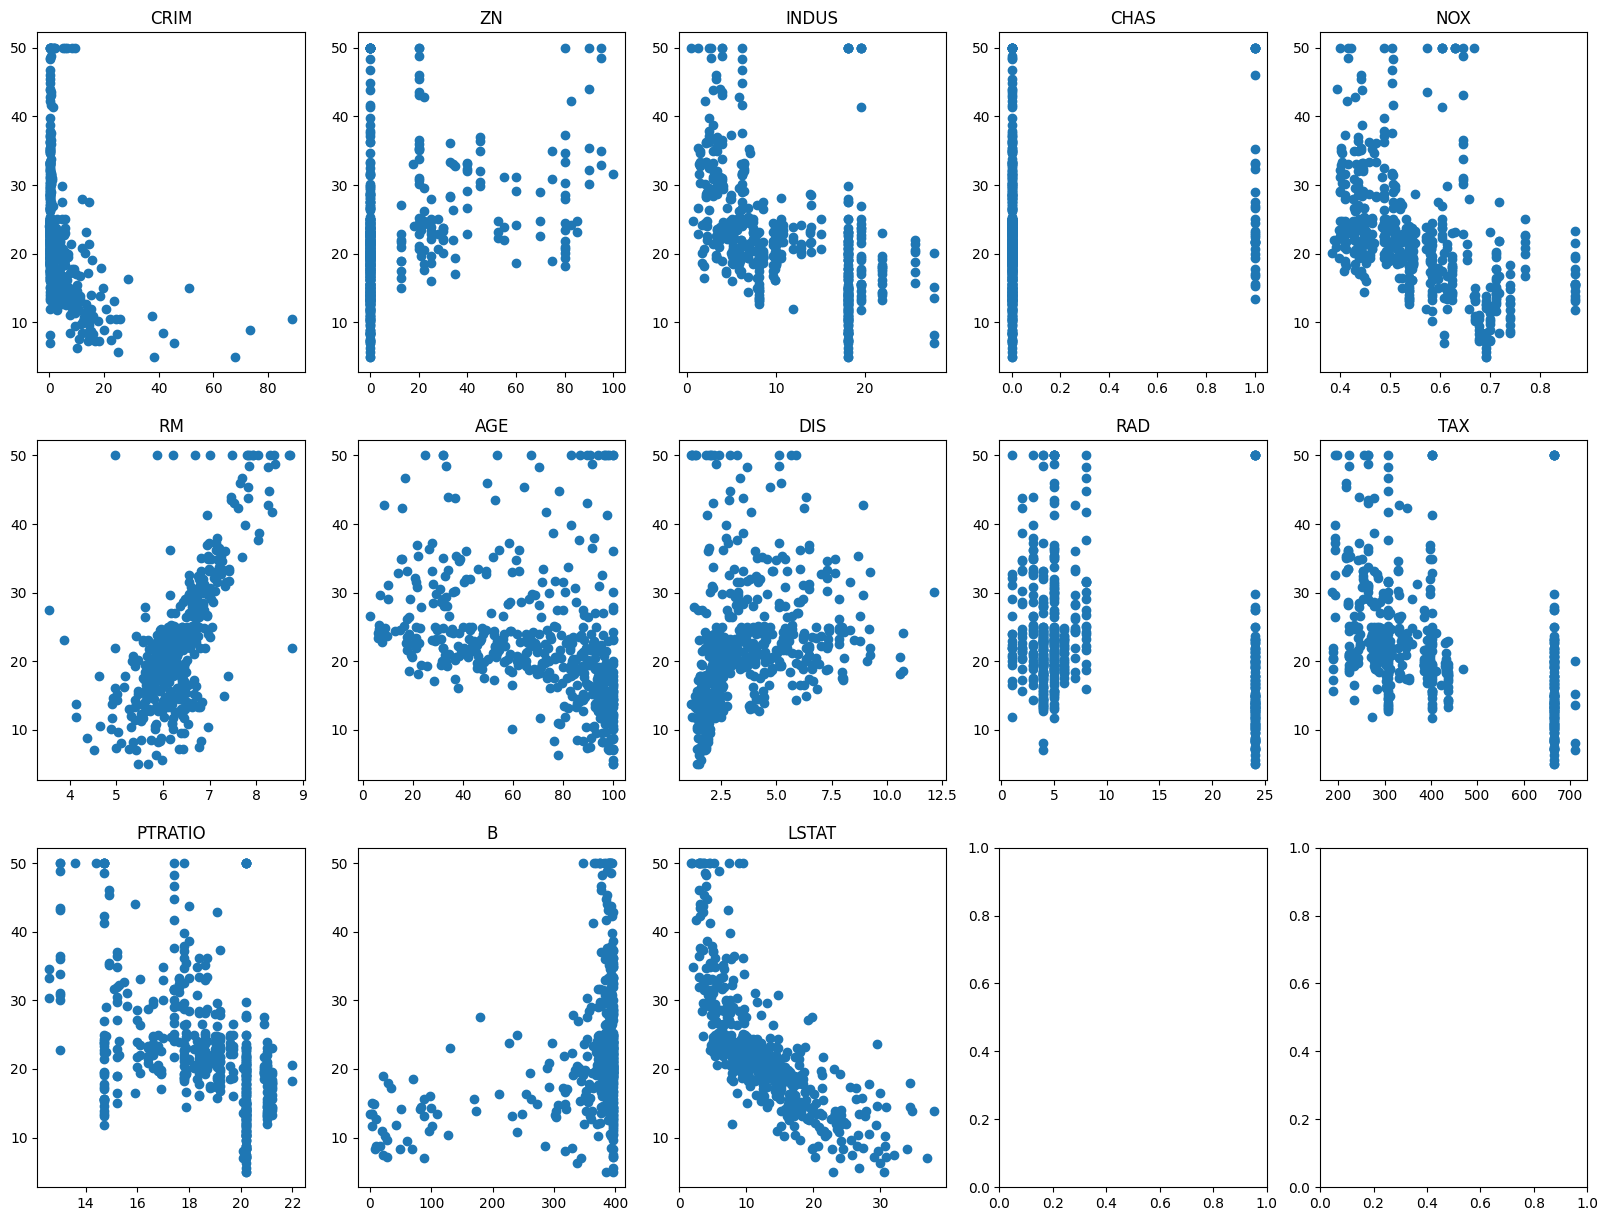

In [107]:
fig, ax = plt.subplots(len(data.columns)//5 + 1, 5, figsize=(20,15))

for i, c in enumerate(data.columns) :
    ax[i//5][i%5].scatter(data[c], target)
    ax[i//5][i%5].set_title(c)

As you should be able to see from the scatter plots, features 'CHAS' and 'RAD' appear to be categorical values, as they form straight lines (vertical lines, if target value is represented by the y-axis). This coincides with the dataset attribute description.

**Visualize** the distribution of each feature using a plot of your choice. Additionally, **plot the cross-correlations** of all features. This will highlight redundancies in our dataset.

*Hint: DataFrames have built-in methods for simple visualizations. You may use them.*

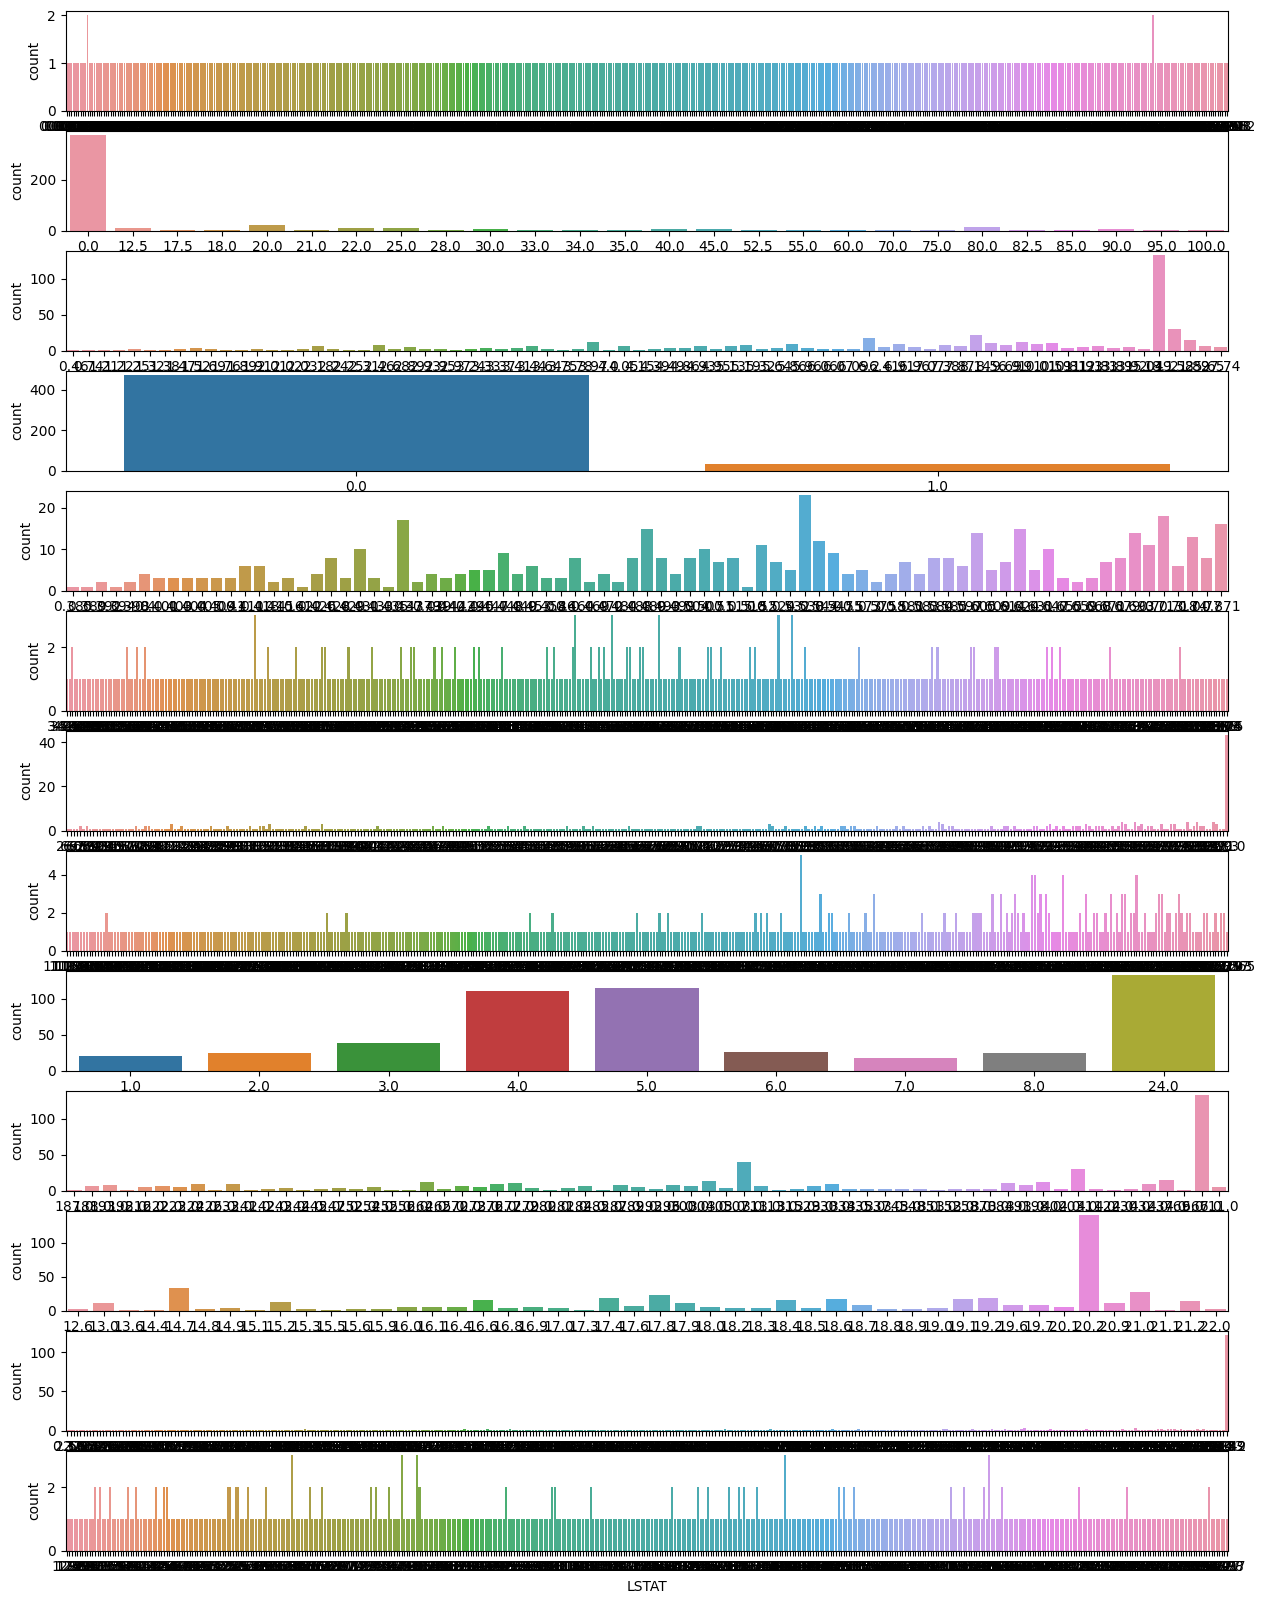

In [93]:
# visualize the distribution of features
fig, ax = plt.subplots(len(data.columns), 1, figsize=(15,20))

for i, c in enumerate(data.columns) :
    sns.countplot(data=data, x=c, ax=ax[i])

<AxesSubplot:>

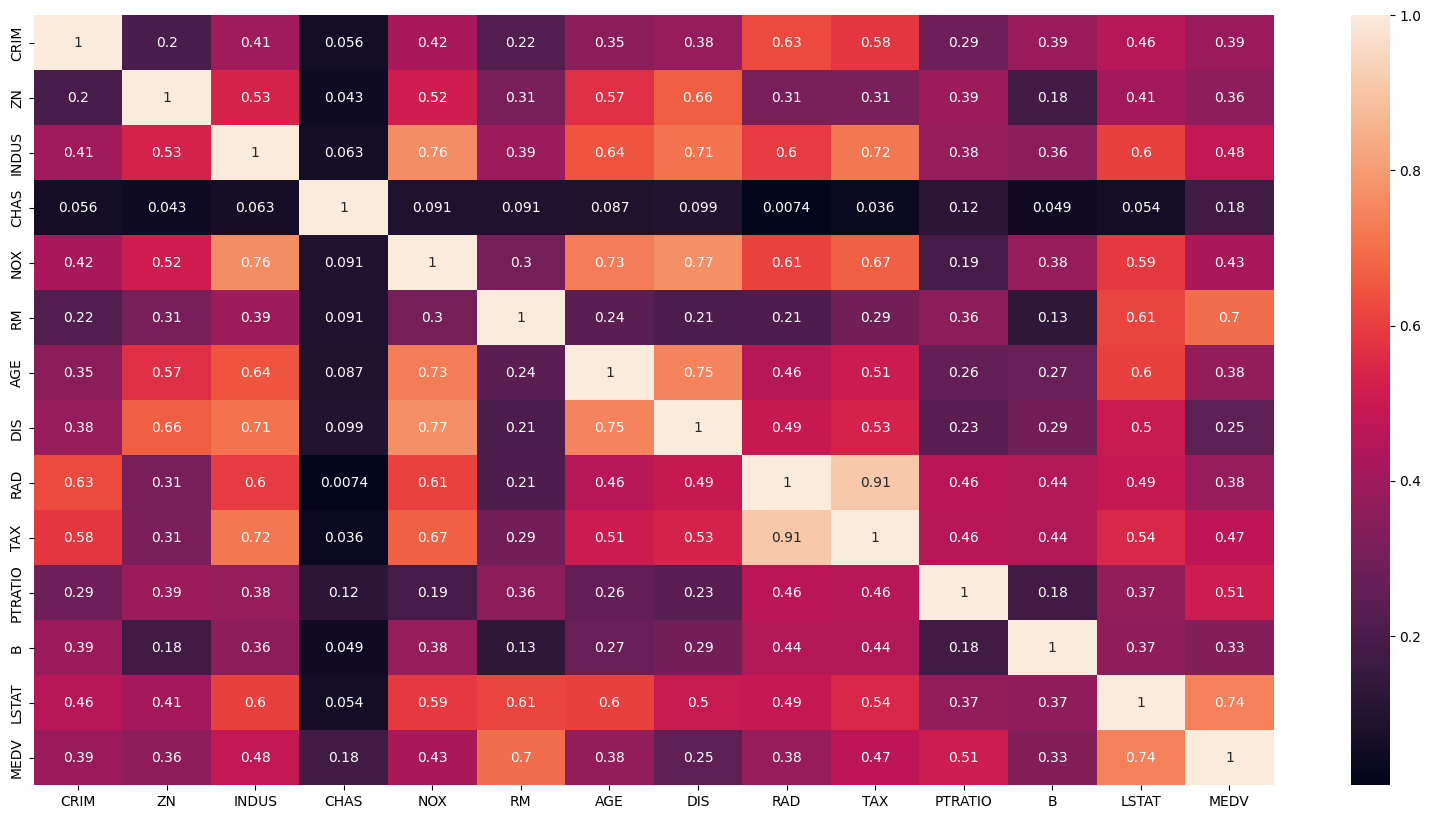

In [122]:
# calculate and print the cross-correlation matrix for X
plt.figure(figsize=(20,10))
cross_cor = pd.concat([data, target], axis=1).corr(numeric_only=False).abs()
sns.heatmap(cross_cor, annot=True)

# visualize the cross-correlations between all features

Now, **preprocess the data and targets** by normalizing continuous features using mean normalization and one-hot-encoding categorical features (CHAS is already one-hot-encoded).

In [6]:
# normalize continuous features

data_ = data.copy()
cont_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

scaler = StandardScaler()

data_[cont_features] = scaler.fit_transform(data_[cont_features])
data_.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,0.069170,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,9.549407,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,0.253994,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,8.707259,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,0.000000,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,1.000000,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,0.000000,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,4.000000,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,0.000000,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,5.000000,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,0.000000,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,24.000000,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,1.000000,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,24.000000,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


In [9]:
# one-hot-encode the 'RAD' feature

dummies = pd.get_dummies(data_, columns=['RAD'])
print((dummies[:5]))

for i in dummies.columns :
    print(i)

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909   0.0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381   0.0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381   0.0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878   0.0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878   0.0 -0.835284  1.228577 -0.511180  1.077737   

        TAX   PTRATIO  ...     LSTAT  RAD_1.0  RAD_2.0  RAD_3.0  RAD_4.0  \
0 -0.666608 -1.459000  ... -1.075562        1        0        0        0   
1 -0.987329 -0.303094  ... -0.492439        0        1        0        0   
2 -0.987329 -0.303094  ... -1.208727        0        1        0        0   
3 -1.106115  0.113032  ... -1.361517        0        0        1        0   
4 -1.106115  0.113032  ... -1.026501        0        0        1        0   

   RAD_5.0  RAD_6.0  RAD_7.0  RAD_8.0  RAD_24.0  
0     

**Split the data** into training set and test set (80%/20%).


In [57]:
# split data and target DataFrames into data train, data test, target train and target test datasets

"""def split (data, target) :
    assert len(data) == len(target)
    l = int(np.floor(len(data) * 0.8))
    tmp = pd.concat([data, target], axis = 1)
    train = tmp.sample(l)
    test = tmp.drop(train.index)
    return (train.drop(target.columns, axis = 1), test.drop(target.columns, axis = 1), train[target.columns], test[target.columns])
"""

data_train, data_test, target_train, target_test = train_test_split(dummies, target, train_size=0.8)

print(data_train.shape, target_train.shape, type(target_train))
target_train[:5]

(404, 21) (404, 1) <class 'pandas.core.frame.DataFrame'>


,MEDV
245,18.5
195,50.0
267,50.0
353,30.1
67,22.0


**Define a total of 4 linear regression models**. For weight regularization, one should use Ridge ($L^2$) regression and the other should use Lasso ($L^1$) regression. **Train both models** with MSE and MAE loss functions. You can use an optimizer of your choice.

In [107]:
# define linear regression models in TensorFlow
# with L2 weight regularization (Ridge regression)
# with L1 regularization (Lasso regression)
# test MSE and MAE loss functions, what is the difference?

def model (inp, kernel, name) :
    ret = tf.keras.Sequential(name = name)
    ret.add(layers.Dense(units=1, input_shape=inp, kernel_regularizer=kernel))
    return ret

ridge_model_mse = model((21,), 'l2', 'ridge_mse')
ridge_model_mae = model((21,), 'l2', 'ridge_mae')


lasso_model_mse = model((21,), 'l1', 'lasso_mse')
lasso_model_mae = model((21,), 'l1', 'lasso_mae')

models = [ridge_model_mse, ridge_model_mae, lasso_model_mse, lasso_model_mae]
hist = []

nl_model_mse = tf.keras.Sequential([
    layers.Dense(units=64, input_shape=(21,), activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(units=32, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(units=1)], 
    name = 'non-linear_mse')

models.append(nl_model_mse)

nl_model_mae = tf.keras.models.clone_model(nl_model_mse)
nl_model_mae._name = 'non_linear_mae'
models.append(nl_model_mae)


for model in models :
    model.summary()

for i, model in enumerate(models) : 
    if 'mae' in model.name : loss = tf.keras.losses.MeanAbsoluteError()
    else : loss = tf.keras.losses.MeanSquaredError()
    if 'non' in model.name: opti = tf.keras.optimizers.Adam(learning_rate=1e-3)
    else : opti = tf.keras.optimizers.Adam(learning_rate=1e-1)
    model.compile(optimizer = opti, loss=loss)
    hist.insert(i, model.fit(data_train, target_train, epochs=100, verbose=False))

Model: "ridge_mse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_212 (Dense)           (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Model: "ridge_mae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 1)                 22        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Model: "lasso_mse"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_214 (Dense)         

Now, additionally **train a non-linear neural network** consisting of three dense layers (64/32/1 units). Use ReLU activations after each layer except the last.

It's time to evaluate the performance of your models. For regression tasks, it is interesting to compare the values predicted by the models for a given set of features with the actual ground truth. Start by **creating a scatter plot** that has predicted values on one axis and the true values on the other axis. Also **calculate the $R^2$ score** for each model. You may use the [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn-metrics-r2-score) function from scikit learn.

If most of the plotted points lie around the x=y line, the model is performing well.

6
4/4 [==============================] - 0s 3ms/step


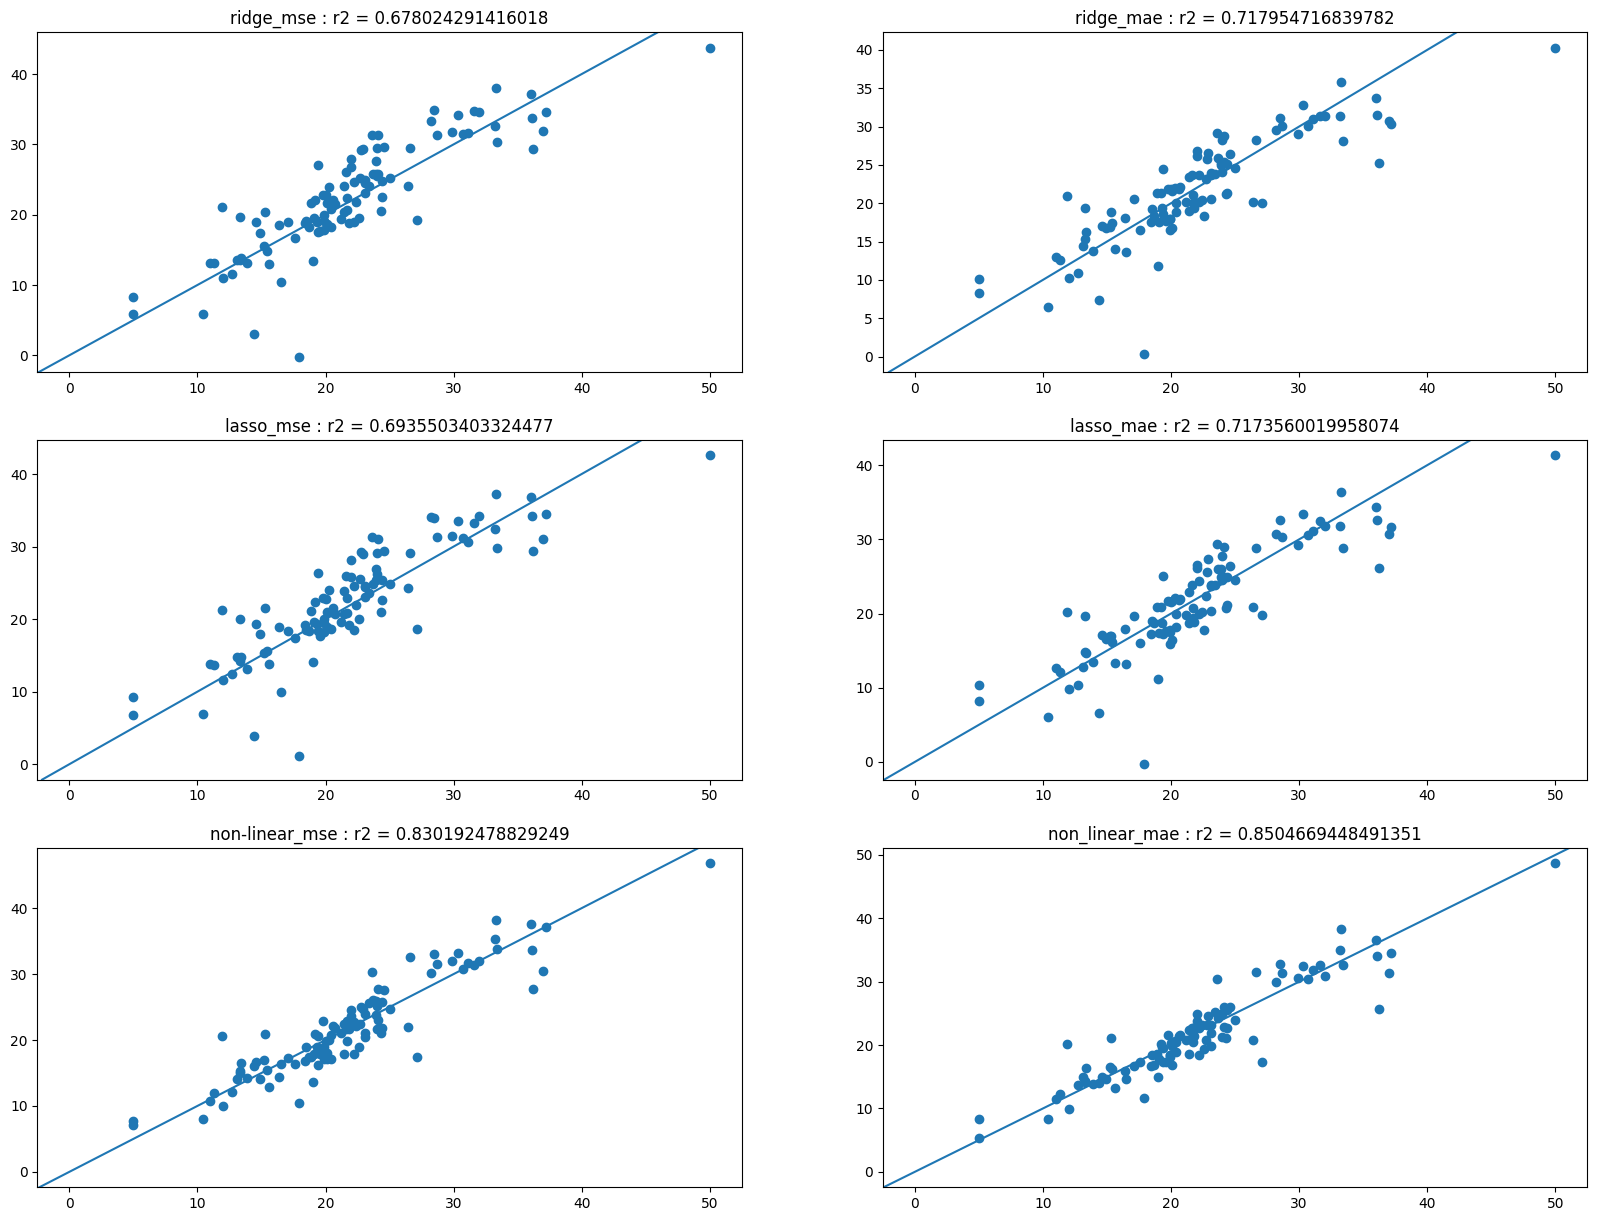

In [112]:
# plot true against predicted values for each model
print(len(models))
pred = []
fig, ax = plt.subplots(3,2, figsize=(20,15))
for i, model in enumerate(models) :
    pred.insert(i, model.predict(data_test))
    ax[i//2][i%2].scatter(target_test, pred[i])
    ax[i//2][i%2].axline((0,0), (1,1))
    ax[i//2][i%2].set_title(model.name + ' : r2 = ' + str(r2_score(target_test, pred[i])))

Compare the $R^2$ scores of the models. You should be able to recognize large differences between the neural networks and linear regression models. Why do neural networks perform so much better on this task?

Plot the error (also called 'residual') distribution for each model by plotting histograms of the differences between predicted and ground truth values.

Ideally, the residuals are normally distributed and centered at 0. 

4/4 [==============================] - 0s 4ms/step


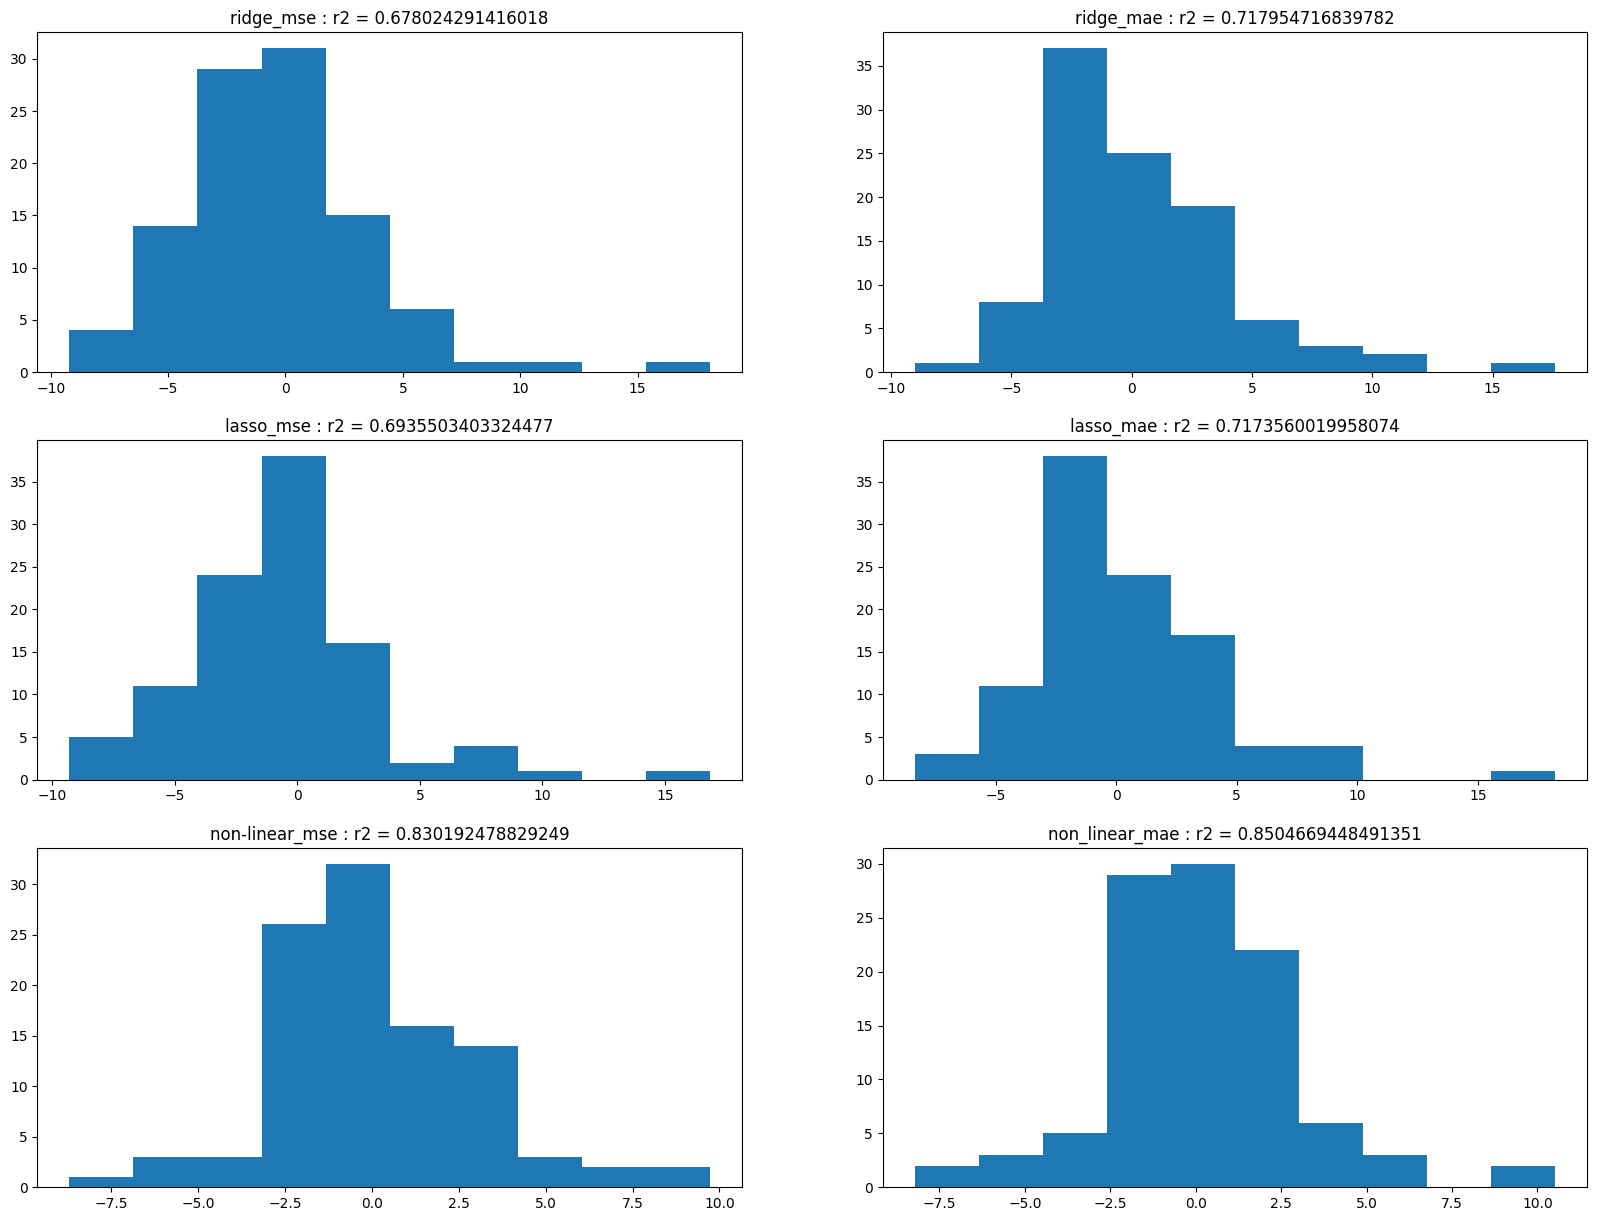

In [110]:
# plot the error (residual) distribution for each model

fig, ax = plt.subplots(3,2, figsize=(20,15))
for i, model in enumerate(models) :
    pred.insert(i, model.predict(data_test))
    ax[i//2][i%2].hist(target_test-pred[i])
    ax[i//2][i%2].set_title(model.name + ' : r2 = ' + str(r2_score(target_test, pred[i])))

In [128]:
# print abs correlation with target
print(cross_cor['MEDV'].sort_values())

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


Train a linear regression model and a non-linear regression model on the variable that has the highest correlation with the target only.
Do a scatterplot of the data points and plot the regression model into the scatterplot.

In [176]:
lin_reg = tf.keras.Sequential(name='lin_reg')
lin_reg.add(layers.Dense(units=1, input_shape=(1,), activation=None))

nl_reg = tf.keras.Sequential(name='nl_reg')
nl_reg.add(layers.Dense(units=64, input_shape=(1,), activation='relu'))
#nl_reg.add(layers.Dropout(0.5))
nl_reg.add(layers.Dense(units=16, activation='relu'))
nl_reg.add(layers.Dense(units=1, activation=None))

lin_reg.compile(loss = tf.keras.losses.MeanAbsoluteError(), optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1), metrics=['accuracy'])
nl_reg.compile(loss = tf.keras.losses.MeanAbsoluteError(), optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1), metrics=['accuracy'])

lin_reg.summary()
nl_reg.summary()

Model: "lin_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_281 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "nl_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 64)                128       
                                                                 
 dense_283 (Dense)           (None, 16)                1040      
                                                                 
 dense_284 (Dense)           (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-t

In [177]:
hist_lin = lin_reg.fit(data_train['LSTAT'], target_train, epochs=100)
hist_nl = nl_reg.fit(data_train['LSTAT'], target_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 22.1274 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 20.8231 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 19.5172 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 18.2213 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 16.9170 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 15.6189 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 14.3200 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 13.0403 - accuracy: 0.0000e+00
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 11.7996 - accuracy: 0.0000e+00
Epoch 10/100
13/13 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'lin : 0.5348957790065283')

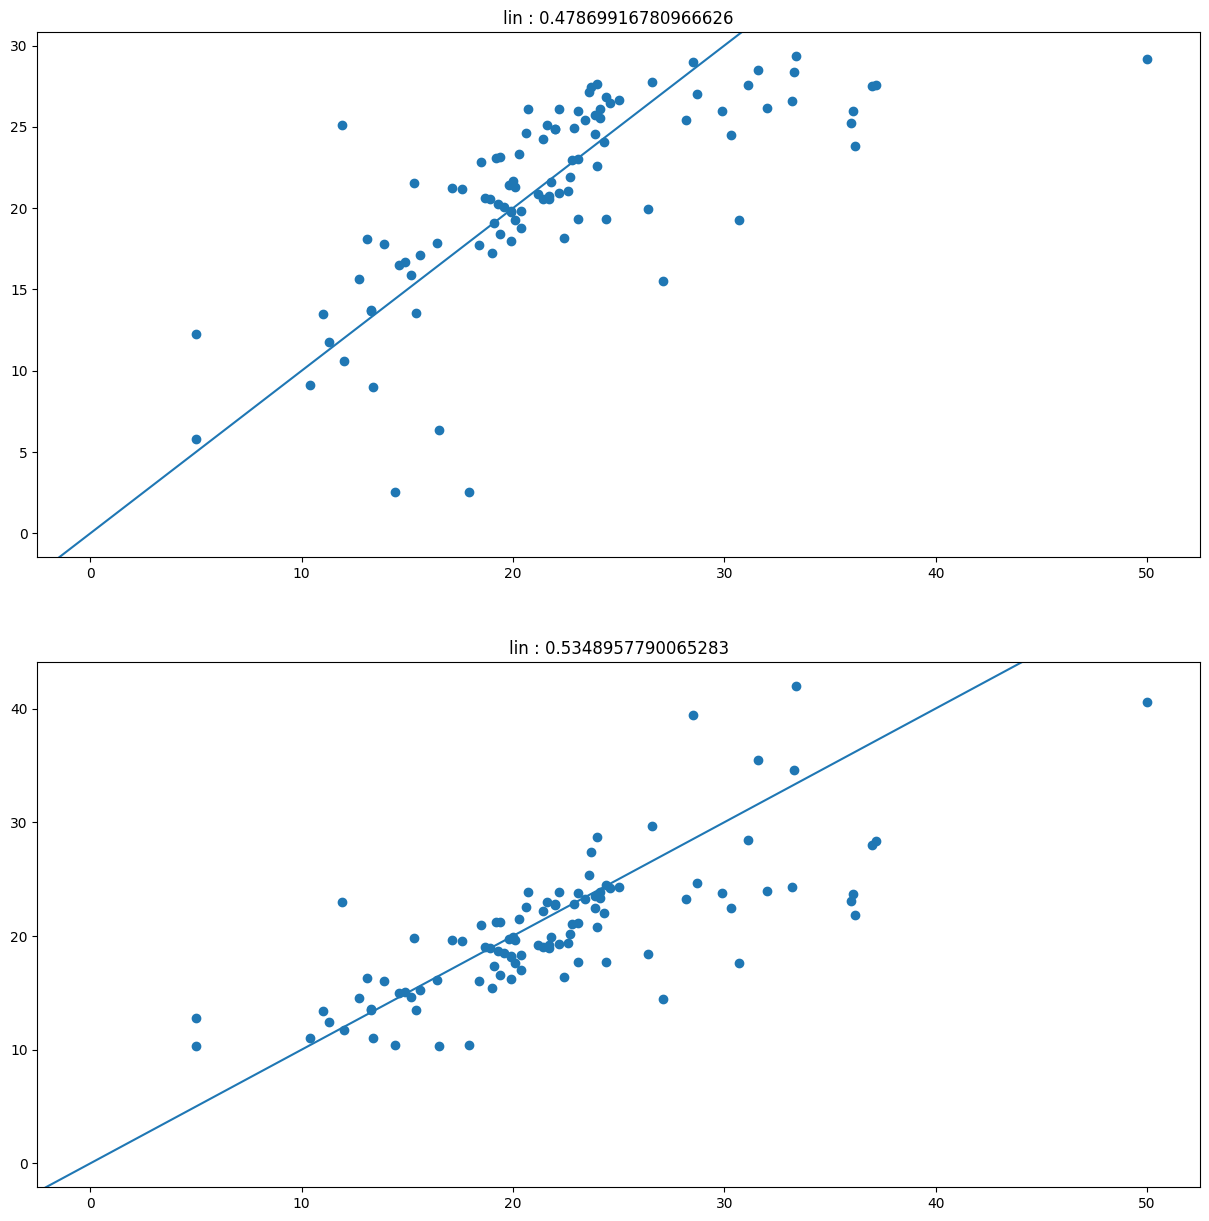

In [220]:
pred = []
fig, ax = plt.subplots(2, figsize=(15,15))

dots = pd.Series(np.linspace(-2.,2., num=102, axis=-1))

predlin = lin_reg.predict(data_test['LSTAT'])
plotlin = lin_reg.predict(dots)
ax[0].scatter(target_test, predlin)
#ax[0].plot(plotlin,plotlin)
ax[0].axline((0,0),(1,1))
ax[0].set_title('lin : ' + str(r2_score(target_test, predlin)))

prednl = nl_reg.predict(data_test['LSTAT'])
plotnl = nl_reg.predict(dots)

ax[1].scatter(target_test, prednl)
#ax[1].plot(plotnl,plotnl)
ax[1].axline((0,0),(1,1))
ax[1].set_title('lin : ' + str(r2_score(target_test, prednl)))
